[View in Colaboratory](https://colab.research.google.com/github/nanometers/QuantWork/blob/master/UnsupervisedML_QuantTest.ipynb)

In [10]:
!pip install pandas
!pip install pandas-datareader
!pip install numpy
!pip install sklearn
!pip install matplotlib

In [0]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = web.DataReader(['SPY','AMZN'], 'morningstar', start = '2007-01-01', end = '2017-01-01')
df = df[['Open', 'High', 'Low', 'Close']]
df['open'] = df['Open'].shift(1)
df['high'] = df['High'].shift(1)
df['low'] = df['Low'].shift(1)
df['close'] = df['Close'].shift(1)

df = df[['open', 'high', 'low', 'close']]

df = df.dropna()

In [0]:
unsup = mix.GaussianMixture(n_components = 4, 
                           covariance_type = 'spherical',
                           n_init = 100,
                           random_state = 42)

In [0]:
unsup.fit(np.reshape(df, (-1, df.shape[1])))
regime = unsup.predict(np.reshape(df, (-1, df.shape[1])))

In [0]:
# Calculate the returns of the day
df['Return'] = np.log(df['close']/df['close'].shift(1))

In [0]:
# Create dataframe Regimes which has OHLC and Return values along with Regime classification
Regimes = pd.DataFrame(regime, columns = ['Regime'], index = df.index).join(df, how = 'inner').assign(market_cu_return = df.Return.cumsum()).reset_index(drop=False).rename(columns={'index':'Date'})

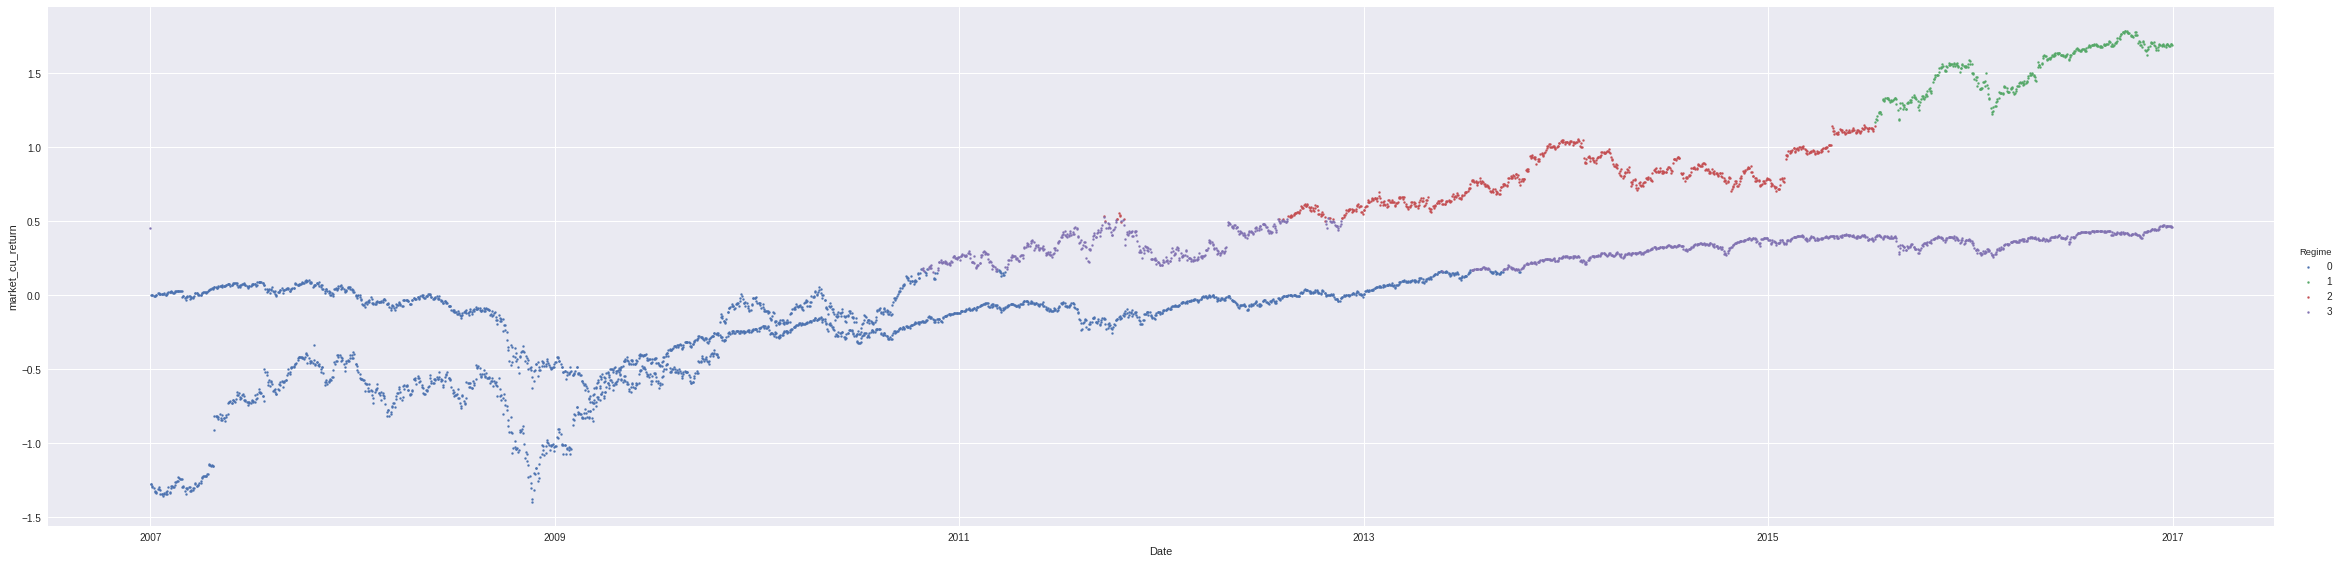

In [17]:
# Create list called 'order' with values corr to Regime classification and plot values to see how well algo did
order = [0, 1, 2, 3]
fig = sns.FacetGrid(data = Regimes, hue = 'Regime', hue_order = order, aspect = 4, size = 8)
fig.map(plt.scatter, 'Date', 'market_cu_return', s = 4).add_legend()
plt.show()

In [18]:
for i in order:
  print("Mean for regime %i: " %i,unsup.means_[i][0])
  print("Co-variance for regime %i: " %i, (unsup.covariances_[i]))

Mean for regime 0:  112.46518504255992
Co-variance for regime 0:  1016.735822970397
Mean for regime 1:  658.6315487304062
Co-variance for regime 1:  10821.951089284885
Mean for regime 2:  320.03329974616054
Co-variance for regime 2:  2950.5417561172867
Mean for regime 3:  198.9137669940262
Co-variance for regime 3:  259.2990125182438
